In [1]:
# !pip install nltk --quiet

In [2]:
import nest_asyncio
import sys
from green_mood_tracker.twint_class import TWINT
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download
from green_mood_tracker.training_data import get_raw_data_notebook

## download and clean data

In [3]:
raw_data = get_raw_data_notebook()

/Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/green_mood_tracker/training_data.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sentiment140_final['polarity'] = sentiment140_final.polarity.map({4:2,0:0})
/Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/green_mood_tracker/training_data.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sentiment140_final['source'] = 'sentiment140'


In [4]:
from green_mood_tracker.data_cleaning import clean
raw_data = get_raw_data_notebook()
raw_data_clean = clean(raw_data,'text')
raw_data_clean.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henryhall/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,text,polarity,source
0,1467933112,angel going miss athlete weekend,0,sts_gold
1,2323395086,look though shaq getting traded cleveland play...,0,sts_gold
2,1467968979,april th isnt coming soon enough,0,sts_gold
3,1990283756,drinking mcdonalds coffee understanding someon...,0,sts_gold
4,1988884918,dissapointed taylor swift doesnt twitter,0,sts_gold


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633048 entries, 0 to 1599999
Data columns (total 4 columns):
id          1633048 non-null object
text        1633048 non-null object
polarity    1633048 non-null int64
source      1633048 non-null object
dtypes: int64(1), object(3)
memory usage: 62.3+ MB


## select source of data

In [6]:
raw_data_clean_sts_gold = raw_data_clean.query('source==\'sts_gold\'')

In [7]:
raw_data_clean_sts_gold.shape

(2034, 4)

In [122]:
raw_data_clean = raw_data_clean[raw_data_clean['polarity']!=1]

In [123]:
raw_data_clean.source.value_counts()

sentiment140              1600000
kaggle_sentiment_train      16363
kaggle_sentiment_test        2104
sts_gold                     2034
Name: source, dtype: int64

In [124]:
raw_data_clean.polarity.value_counts()

2    810317
0    810184
Name: polarity, dtype: int64

In [10]:
raw_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633048 entries, 0 to 1599999
Data columns (total 4 columns):
id          1633048 non-null object
text        1633048 non-null object
polarity    1633048 non-null int64
source      1633048 non-null object
dtypes: int64(1), object(3)
memory usage: 62.3+ MB


## sample data

In [125]:
data_sample = raw_data_clean.sample(n=30_000,random_state=0).reset_index()
data_sample.head()

,index,id,text,polarity,source
0,336834,2014083611,pinch even fought amma hate new goatee sd look...,0,sentiment140
1,622734,2229303528,didnt even get try week,0,sentiment140
2,1016867,1881768019,giving jack quick hair cut,2,sentiment140
3,1090541,1969804803,pirate game sat sun work monday tuesthur work ...,2,sentiment140
4,947493,1823084268,fun night,2,sentiment140


In [126]:
data_sample['text'] = data_sample.text.apply((lambda x: x.split()))

In [76]:
# X.iloc[0]

In [77]:
len(X_train_pad[1])

27

## split data

In [127]:
from sklearn.model_selection import train_test_split

X = data_sample.text
y = data_sample.polarity

sentence_train, sentence_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [51]:
y_train.shape

(70000,)

In [52]:
# !pip install tensorflow --quiet

## tokenize

In [128]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(sentence_train)
word_to_id = tk.word_index
id_to_word = {value:key for key,value in word_to_id.items()}
sentences_token_train = tk.texts_to_sequences(sentence_train)
sentences_token_test = tk.texts_to_sequences(sentence_test)
tk.word_counts['film']

22

In [54]:
len(word_to_id)

50730

In [55]:
sentences_token_train[0]

[16274, 199, 3, 104, 16275, 4475, 16276, 16277]

## pad data

In [129]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def generate_data(X_train,X_test):
    
    # YOUR CODE HERE
    X_train_pad = pad_sequences(X_train,value= 0, dtype = 'float32',padding='post')
    X__test_pad = pad_sequences(X_test,value= 0, dtype = 'float32',padding='post')
    
    return X_train_pad,X__test_pad

X_train_pad, X_test_pad = generate_data(sentences_token_train,sentences_token_test)

In [57]:
sentence_train[1]

['tried', 'callin', 'past', 'dayz', 'tu', 'e', 'bueno', 'wey']

In [58]:
len(id_to_word)

50730

In [59]:
len(sentences_token_train[1000])

8

In [60]:
X_train_pad[0]

array([1.6274e+04, 1.9900e+02, 3.0000e+00, 1.0400e+02, 1.6275e+04,
       4.4750e+03, 1.6276e+04, 1.6277e+04, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00], dtype=float32)

In [61]:
y_train.value_counts()

2    34772
0    34710
1      518
Name: polarity, dtype: int64

## convert target to categorical

In [81]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [82]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [83]:
vocab_size

50730

## try with word2vec

In [109]:
!pip install gensim --quiet

You should consider upgrading via the 'pip install --upgrade pip' command.


In [110]:
from gensim.models import Word2Vec

word2vec = Word2Vec(sentences=sentence_train)

In [111]:
import numpy as np

example = ['this', 'movie', 'is', 'probably', 'the', 'worst', 'action', 'movie', 'ever']

def embed_sentence(word2vec, sentence):
    # YOUR CODE HERE
    embedded=[]
    for word in sentence:
        if word in word2vec.wv.vocab.keys():
            embed = word2vec.wv['word']
            embed = list(embed)
            embedded.append(embed)
            
    embedded = np.vstack(embedded)
    return embedded
        
embedded_sentence = embed_sentence(word2vec, example)
    
# assert(type(embedded_sentence) == np.ndarray)
# assert(embedded_sentence.shape == (9, 100))

In [121]:
embedded_sentence[0]

array([ 1.18525915e-01, -3.23420316e-01,  2.72321999e-01, -3.43226761e-01,
       -1.51774898e-01,  5.35698593e-01, -1.79995209e-01, -4.40967858e-01,
       -3.38869065e-01,  2.61705279e-01,  1.70281574e-01,  5.36772236e-02,
        2.20551044e-02,  1.65240437e-01,  5.24135567e-02, -4.72418159e-01,
       -3.01255077e-01, -3.56817096e-01,  9.80893597e-02, -8.06644037e-02,
        2.84551561e-01, -2.31541142e-01, -4.13454235e-01,  5.49194142e-02,
       -1.80294999e-04,  5.96493296e-02,  3.69755685e-01,  2.78496414e-01,
        1.32644907e-01, -4.12509173e-01,  1.43124936e-02, -4.88115191e-01,
        4.33020830e-01,  1.80077404e-01, -3.49467486e-01, -7.08681419e-02,
       -2.04994574e-01,  2.88845718e-01, -3.75334620e-01,  1.02128841e-01,
        6.59795627e-02,  1.30470842e-01,  2.91628331e-01, -4.99717183e-02,
        4.04620886e-01,  1.50136352e-01, -1.88198045e-01,  3.97533864e-01,
        2.34565716e-02,  2.42017657e-02, -2.50394046e-01,  1.20108686e-01,
        1.72231719e-01, -

In [116]:
def embedding(word2vec, sentences):
    embedding=[]
    # YOUR CODE HERE
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        
        embedding.append(embedded_sentence)
    return embedding
    
    
X_train = embedding(word2vec, sentence_train.values.T.tolist())
X_test = embedding(word2vec, sentence_test.values.T.tolist())

ValueError: need at least one array to concatenate

In [ ]:
def generate_data_w2v(X_train,X_test):
    
    # YOUR CODE HERE
    X_train_pad = pad_sequences(X_train,value= 0., dtype = 'float32',padding='post')
    X__test_pad = pad_sequences(X_test,value= 0., dtype = 'float32',padding='post')
    
    return X_train_pad,X__test_pad

X_train_pad_word2V, X__test_pad_word2v = generate_data_w2v(X_train,X_test)

In [ ]:
vocab_size=len(word2vec.wv.vocab.keys())

def init_model(vocab_size):
    
    # YOUR CODE HERE
    model = Sequential()

    model.add(layers.Masking(mask_value=0.))
    model.add(layers.LSTM(units=13, activation='tanh')) 
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(.2))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(loss= 'categorical_crossentropy', 
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

model_3 = init_model(vocab_size)

In [ ]:
es = EarlyStopping(patience=10,restore_best_weights=True,monitor='val_accuracy')
history_3 = model_3.fit(X_train_pad_word2V, y_train,
          validation_split= 2/7,
          epochs=20, 
          batch_size=16, 
          verbose=1,
          callbacks = [es])

In [ ]:
plot_loss(history_3)

In [ ]:
model.evaluate(X__test_pad_word2v,y_test)

## build lstm model

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

vocab_size=len(word_to_id)

def init_model(vocab_size):
    
    # YOUR CODE HERE
    model = Sequential()

    model.add(layers.Masking(mask_value=0.))
    model.add(layers.Embedding(input_dim=vocab_size+1, output_dim=100))
    model.add(layers.LSTM(units=13, activation='tanh')) 
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(.2))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss= 'binary_crossentropy', 
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

model = init_model(vocab_size)

In [38]:
# model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 100)         1090000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 13)                5928      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 1,097,019
Trainable params: 1,097,019
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_pad.shape

In [131]:
# YOUR CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10,restore_best_weights=True,monitor='val_accuracy')
history = model.fit(X_train_pad, y_train,
          validation_split= 2/7,
          epochs=100, 
          batch_size=16, 
          verbose=1,
          callbacks = [es])

Epoch 1/100
938/938 [==============================] - 25s 26ms/step - loss: -8.3068 - accuracy: 0.0795 - val_loss: -30.0379 - val_accuracy: 0.2223
Epoch 2/100
938/938 [==============================] - 24s 26ms/step - loss: -105.6052 - accuracy: 0.3009 - val_loss: -166.2690 - val_accuracy: 0.3107
Epoch 3/100
938/938 [==============================] - 22s 24ms/step - loss: -377.9568 - accuracy: 0.3513 - val_loss: -410.3668 - val_accuracy: 0.3795
Epoch 4/100
938/938 [==============================] - 23s 25ms/step - loss: -856.6038 - accuracy: 0.3584 - val_loss: -802.7076 - val_accuracy: 0.3473
Epoch 5/100
938/938 [==============================] - 22s 23ms/step - loss: -1553.7032 - accuracy: 0.3669 - val_loss: -1227.4235 - val_accuracy: 0.3890
Epoch 6/100
938/938 [==============================] - 21s 23ms/step - loss: -2514.9353 - accuracy: 0.3689 - val_loss: -1815.8495 - val_accuracy: 0.3012
Epoch 7/100
938/938 [==============================] - 22s 24ms/step - loss: -3635.4026 - acc

KeyboardInterrupt: 

In [71]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Mean Square Error - Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

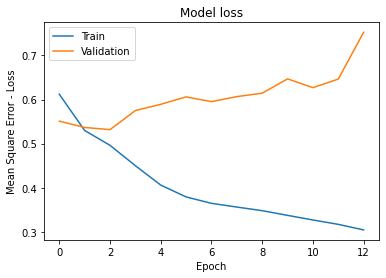

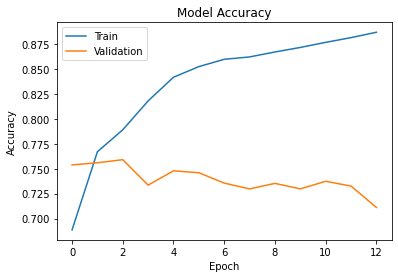

In [73]:

plot_loss(history)

In [70]:
model.evaluate(X_test_pad,y_test)

938/938 [==============================] - 10s 11ms/step - loss: 0.5376 - accuracy: 0.7537


[0.5375714898109436, 0.7537000179290771]

## build convolutional model

In [86]:
def generate_data_cnn(X_train,X_test):
    
    # YOUR CODE HERE
    X_train_pad = pad_sequences(X_train,value= 0, dtype = 'float32',padding='post',maxlen=12)
    X__test_pad = pad_sequences(X_test,value= 0, dtype = 'float32',padding='post',maxlen=12)
    
    return X_train_pad,X__test_pad

X_train_pad_cnn, X_test_pad_cnn = generate_data_cnn(sentences_token_train,sentences_token_test)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

vocab_size=len(word_to_id)

def init_model_cnn(vocab_size):
    
    
    # YOUR CODE HERE
    model = Sequential()

    model.add(layers.Masking(mask_value=0.))
    model.add(layers.Embedding(input_dim=vocab_size+1, output_dim=100,input_length=12))
    model.add(layers.Conv1D(32,3, activation='relu')) 
    model.add(layers.Flatten()) 
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(loss= 'CategoricalCrossentropy', 
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

model_2 = init_model_cnn(vocab_size)

In [106]:
es = EarlyStopping(patience=10,restore_best_weights=True,monitor='val_accuracy')
history_2 = model_2.fit(X_train_pad, y_train,
          validation_split= 2/7,
          epochs=100, 
          batch_size=16, 
          verbose=1,
          callbacks = [es])

Epoch 1/100
938/938 [==============================] - 24s 26ms/step - loss: 0.6384 - accuracy: 0.6691 - val_loss: 0.5740 - val_accuracy: 0.7345
Epoch 2/100
938/938 [==============================] - 24s 26ms/step - loss: 0.5040 - accuracy: 0.7794 - val_loss: 0.5729 - val_accuracy: 0.7383
Epoch 3/100
938/938 [==============================] - 22s 24ms/step - loss: 0.4295 - accuracy: 0.8249 - val_loss: 0.6324 - val_accuracy: 0.7258
Epoch 4/100
938/938 [==============================] - 24s 26ms/step - loss: 0.3376 - accuracy: 0.8719 - val_loss: 0.6784 - val_accuracy: 0.7133
Epoch 5/100
938/938 [==============================] - 25s 26ms/step - loss: 0.2520 - accuracy: 0.9079 - val_loss: 0.8255 - val_accuracy: 0.6923
Epoch 6/100
938/938 [==============================] - 21s 23ms/step - loss: 0.1925 - accuracy: 0.9322 - val_loss: 0.9448 - val_accuracy: 0.6762
Epoch 7/100
938/938 [==============================] - 22s 24ms/step - loss: 0.1527 - accuracy: 0.9456 - val_loss: 1.0592 - val_ac

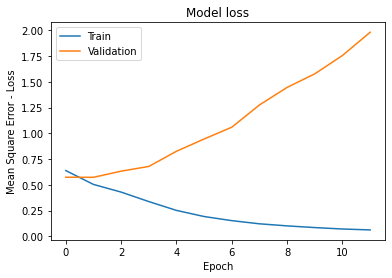

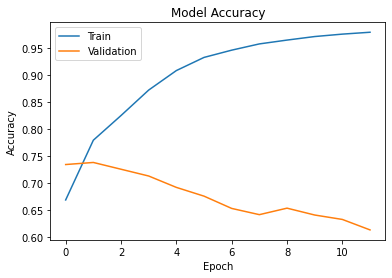

In [107]:
plot_loss(history_2)

In [108]:
model_2.evaluate(X_test_pad_cnn,y_test)

ValueError: in user code:

    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1224 test_function  *
        return step_function(self, iterator)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1208 run_step  **
        outputs = model.test_step(data)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1174 test_step
        y_pred = self(x, training=False)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Users/henryhall/.pyenv/versions/3.7.7/envs/lewagon-3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_12 is incompatible with the layer: expected axis -1 of input shape to have value 800 but received input with shape [None, 320]


In [ ]:
model_2.summary()